In [301]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [291]:
# Importing The Library

In [222]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import seaborn as sns

In [ ]:
# Reading The Data File

In [245]:
data_demand=pd.read_csv("STORE_DATA.csv")
data_demand

,Account,Store,ShipDate,SumOfShipwght,Tour,Store_region,Store_address,store_city
0,5,28,3-Jan-97,481.28,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
1,5,28,10-Jan-97,94.00,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
2,5,28,17-Jan-97,543.72,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
3,5,28,24-Jan-97,580.15,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
4,5,28,7-Feb-97,789.20,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
...,...,...,...,...,...,...,...,...
2333,50,588,17-Jul-97,850.00,NaN,TX,12871 INTERSTATE 10,SAN ANTONIO
2334,50,588,24-Jul-97,10127.40,NaN,TX,12871 INTERSTATE 10,SAN ANTONIO
2335,50,588,31-Jul-97,5564.00,NaN,TX,12871 INTERSTATE 10,SAN ANTONIO
2336,50,588,8-Aug-97,1044.35,NaN,TX,12871 INTERSTATE 10,SAN ANTONIO


In [224]:
#CLEANING THE DATA
data_demand=data_demand.dropna()
data_demand=data_demand[data_demand.SumOfShipwght>0]
data_demand

,Account,Store,ShipDate,SumOfShipwght,Tour,Store_region,Store_address,store_city
0,5,28,3-Jan-97,481.28,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
1,5,28,10-Jan-97,94.00,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
2,5,28,17-Jan-97,543.72,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
3,5,28,24-Jan-97,580.15,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
4,5,28,7-Feb-97,789.20,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
...,...,...,...,...,...,...,...,...
2279,50,585,16-Jul-97,10196.09,87.0,TX,2828 SOUTH HWY 6,HOUSTON
2280,50,585,23-Jul-97,6028.69,87.0,TX,2828 SOUTH HWY 6,HOUSTON
2281,50,585,30-Jul-97,4516.90,87.0,TX,2828 SOUTH HWY 6,HOUSTON
2282,50,585,6-Aug-97,11671.88,87.0,TX,2828 SOUTH HWY 6,HOUSTON


In [225]:
# Only consider Texas Stores
data_demand=data_demand[data_demand.Store_region=='TX']
data_demand

,Account,Store,ShipDate,SumOfShipwght,Tour,Store_region,Store_address,store_city
0,5,28,3-Jan-97,481.28,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
1,5,28,10-Jan-97,94.00,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
2,5,28,17-Jan-97,543.72,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
3,5,28,24-Jan-97,580.15,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
4,5,28,7-Feb-97,789.20,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
...,...,...,...,...,...,...,...,...
2279,50,585,16-Jul-97,10196.09,87.0,TX,2828 SOUTH HWY 6,HOUSTON
2280,50,585,23-Jul-97,6028.69,87.0,TX,2828 SOUTH HWY 6,HOUSTON
2281,50,585,30-Jul-97,4516.90,87.0,TX,2828 SOUTH HWY 6,HOUSTON
2282,50,585,6-Aug-97,11671.88,87.0,TX,2828 SOUTH HWY 6,HOUSTON


In [226]:
# Finding out number of unique stores in our model
a=data_demand.Store.unique()
len(a)

51

Text(0, 0.5, 'frequency')

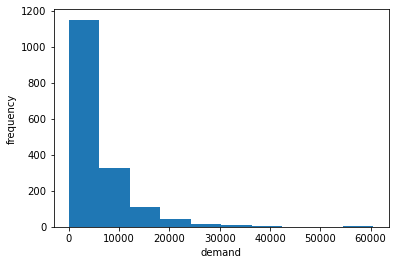

In [227]:
#Plotting to visualize the demand distribution for each store order
plt.hist(data_demand['SumOfShipwght'])
plt.xlabel('demand')
plt.ylabel('frequency')

(array([ 2.,  3.,  8., 12.,  2.,  2.,  0.,  1.,  0.,  1.]),
 array([-486.88 , -122.275,  242.33 ,  606.935,  971.54 , 1336.145,
        1700.75 , 2065.355, 2429.96 , 2794.565, 3159.17 ]),
 <BarContainer object of 10 artists>)

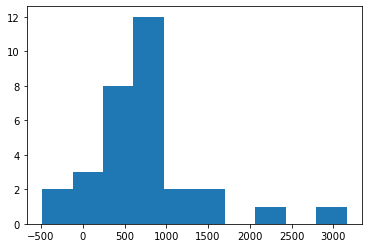

In [254]:
# Visualizing demand variation of the store types to see if any distribution would be suitable 
plt.hist(data_demand[data_demand.Store==28]['SumOfShipwght'])

In [255]:
Source_data=pd.DataFrame(data_demand[["ShipDate","SumOfShipwght"]])
Source_data

,ShipDate,SumOfShipwght
0,3-Jan-97,481.28
1,10-Jan-97,94.00
2,17-Jan-97,543.72
3,24-Jan-97,580.15
4,7-Feb-97,789.20
...,...,...
2333,17-Jul-97,850.00
2334,24-Jul-97,10127.40
2335,31-Jul-97,5564.00
2336,8-Aug-97,1044.35


In [257]:
# Finding Aggregate weekly demand

In [232]:
from datetime import datetime
Source_data.ShipDate=pd.to_datetime(Source_data.ShipDate)

In [233]:
Source_data['weeklyship']=Source_data["ShipDate"].dt.to_period("W")

In [234]:
aggregation_functions = {'SumOfShipwght': 'sum'}
Source_data_weekly = Source_data.groupby(Source_data['weeklyship']).aggregate(aggregation_functions)
Source_data_weekly

,SumOfShipwght
weeklyship,
1996-12-30/1997-01-05,58578.34
1997-01-06/1997-01-12,171909.32
1997-01-13/1997-01-19,201032.87
1997-01-20/1997-01-26,167985.66
1997-01-27/1997-02-02,205277.06
1997-02-03/1997-02-09,219849.82
1997-02-10/1997-02-16,223398.20
1997-02-17/1997-02-23,274383.61
1997-02-24/1997-03-02,280742.76


In [258]:
# Plotting demand of each week to check if there is any seasonal pattern. From the plot we can say that
# No seasonal Pattern was observed

Text(0, 0.5, 'Demand')

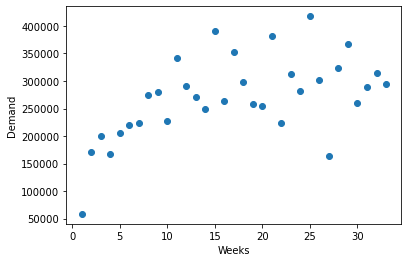

In [252]:
plt.figsize = (20,30)
a=[i+1 for i in range(len(Source_data_weekly["SumOfShipwght"]))]
plt.scatter(a,Source_data_weekly["SumOfShipwght"])
plt.xlabel("Weeks")
plt.ylabel("Demand")

(array([1., 0., 1., 3., 5., 6., 8., 4., 3., 2.]),
 array([ 58578.34 ,  94488.475, 130398.61 , 166308.745, 202218.88 ,
        238129.015, 274039.15 , 309949.285, 345859.42 , 381769.555,
        417679.69 ]),
 <BarContainer object of 10 artists>)

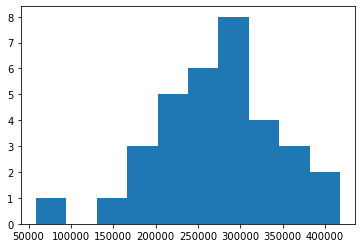

In [259]:
# Plotting histogram of weekly demand.
# Based on this plot we can observe that the normal distribution might be a good fit
plt.hist(Source_data_weekly["SumOfShipwght"])

#### Parameter Estimation - For 4 suitable Distribution Candidates

In [262]:
# Normal Distribution
u,s=ss.norm.fit(Source_data_weekly.SumOfShipwght)
print(f"The maximum Likelyhood estimators for Normal Distribution are: mean is \
{round(u,3)} and std is {round(s,3)}")

# Gamma Distribution
x,y,z=ss.gamma.fit(Source_data_weekly.SumOfShipwght)
print("The maximum Likelyhood estimators for Gamma Distribution are ",\
      {round(x,3),round(y,3),round(z,3)})

# Triangular Distribution
a,b,c=ss.triang.fit(Source_data_weekly.SumOfShipwght)
print("The maximum Likelyhood estimators for Triangular Distribution are ",\
      {round(a,3),round(b,3),round(c,3)})

# Exponrntial Distribution
m,n =ss.expon.fit(Source_data_weekly.SumOfShipwght)
print(f"The maximum Likelyhood estimators for Uniform Distribution are: mean is \
{round(m,3)} and std is {round(n,3)}")

The maximum Likelyhood estimators for Normal Distribution are: mean is 270768.445 and std is 72784.715
The maximum Likelyhood estimators for Gamma Distribution are  {346.534, 3987.604, -1111324.743}
The maximum Likelyhood estimators for Triangular Distribution are  {0.628, 397721.925, 42054.049}
The maximum Likelyhood estimators for Uniform Distribution are: mean is 58578.34 and std is 212190.105


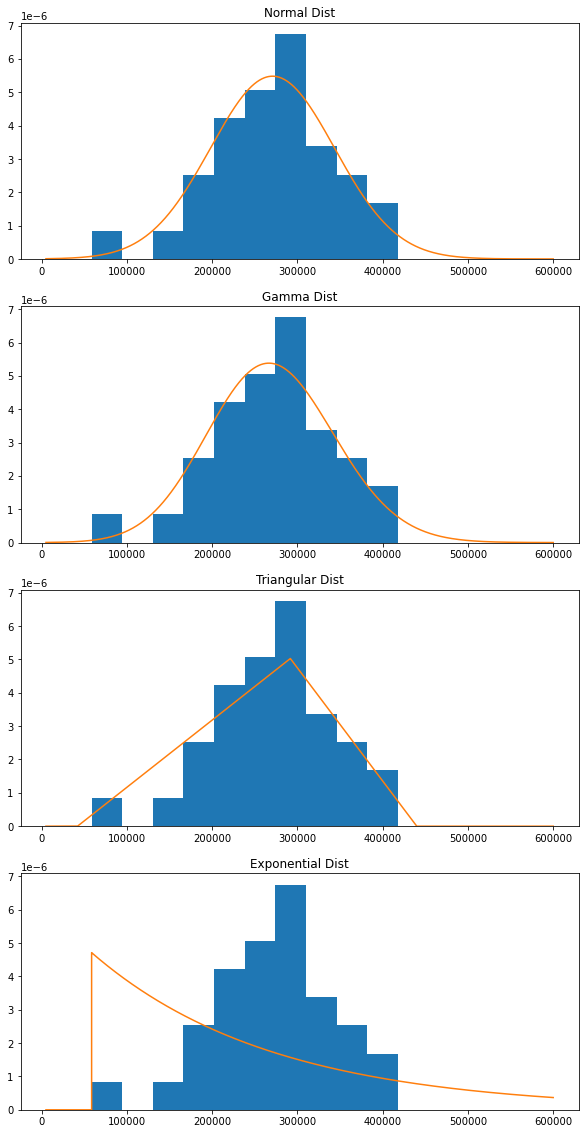

In [264]:
# Plotting Hypothesied Probable distributions over demand data
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (10,20))

ax1.hist(Source_data_weekly.SumOfShipwght,density=True,bins=10)
x_seq = np.arange(5000,600000,1)
y_seq = ss.norm.pdf(x_seq,u,s)
ax1.plot(x_seq, y_seq)
ax1.title.set_text('Normal Dist')

ax2.hist(Source_data_weekly.SumOfShipwght,density=True,bins=10)
x1_seq = np.arange(5000,600000,1)
y1_seq = ss.gamma.pdf(x1_seq,x,y,z)
ax2.plot(x1_seq, y1_seq)
ax2.title.set_text('Gamma Dist')

ax3.hist(Source_data_weekly.SumOfShipwght,density=True,bins=10)
x2_seq = np.arange(5000,600000,1)
y2_seq = ss.triang.pdf(x2_seq,a,b,c)
ax3.plot(x2_seq, y2_seq)
ax3.title.set_text('Triangular Dist')

ax4.hist(Source_data_weekly.SumOfShipwght,density=True,bins=10)
x3_seq = np.arange(5000,600000,1)
y3_seq = ss.expon.pdf(x1_seq,m,n)
ax4.plot(x3_seq, y3_seq)
ax4.title.set_text('Exponential Dist')


In [266]:
# We know that demand can never be negative unless its returns which we are not considering in this case.
# so another important check to find if Nomrla distribition id good fit or not is to check if 0 falls at 
# least 3 standard deviastions away from 
# mean

# Xi = µ ± Zσ
# so to calculate Z (no. of standard deviations from mean)
Z=(u-0)/s
Z
#So as 0 is almost 4 standard deviations away from mean so the probability of having -ve demand will be almost negligible.
#Hence normal distribution can be used

3.720127856182613

#### Q-Q plot

as the scatter plot for Normal Distribution almost lies on the straight line of sloper 45 degreeThus its a good fit


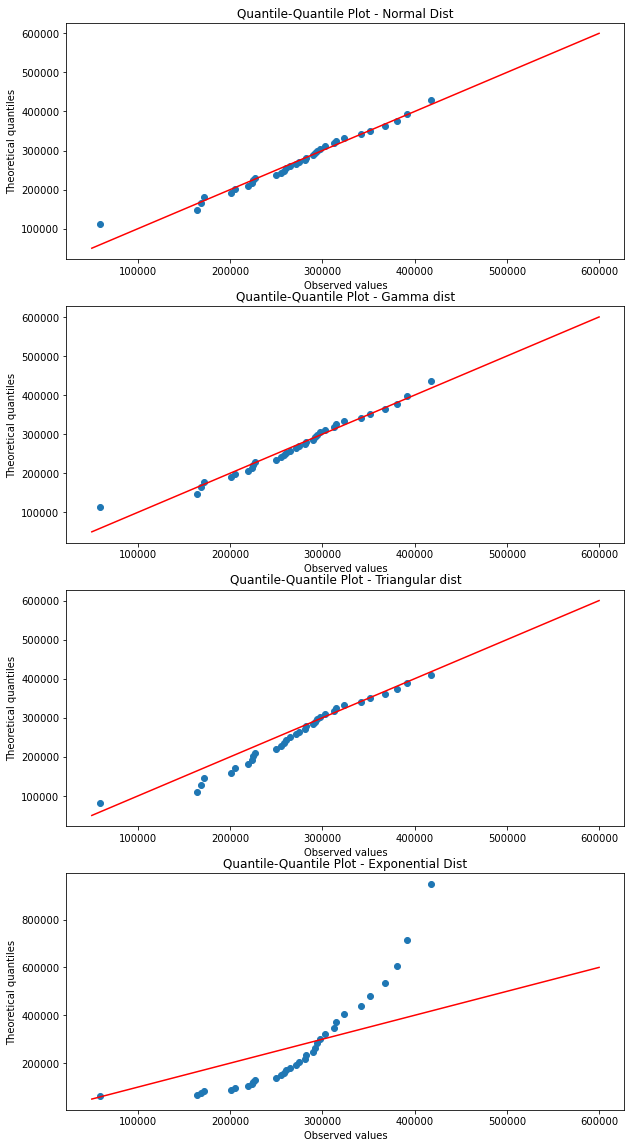

In [269]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (10,20))

# Normal Distributions
normal_estimate = ss.norm(u, s)
# Compute the theoretical q-quantiles for q = (i-.5)/n for i = 1, ..., n
normal_quantile = normal_estimate.ppf((np.arange(1,len(Source_data_weekly.SumOfShipwght)+1)-0.5)/len(Source_data_weekly.SumOfShipwght))
# Sort the sample data in ascending order
Source_data_weekly.SumOfShipwght = np.sort(Source_data_weekly.SumOfShipwght)
ax1.scatter(Source_data_weekly.SumOfShipwght, normal_quantile)
ax1.set_xlabel('Observed values')
ax1.set_ylabel('Theoretical quantiles')
ax1.set_title('Quantile-Quantile Plot - Normal Dist')
ax1.plot([50000,600000], [50000,600000], color='red')
print("as the scatter plot for Normal Distribution almost lies on the straight line of sloper 45 degreeThus its a good fit")

# Gamma Distributions
gamma_estimate = ss.gamma(x,y,z)
# Compute the theoretical q-quantiles for q = (i-.5)/n for i = 1, ..., n
gamma_quantile = gamma_estimate.ppf((np.arange(1,len(Source_data_weekly.SumOfShipwght)+1)-0.5)/len(Source_data_weekly.SumOfShipwght))
# Sort the sample data in ascending order
Source_data_weekly.SumOfShipwght = np.sort(Source_data_weekly.SumOfShipwght)
ax2.scatter(Source_data_weekly.SumOfShipwght, gamma_quantile)
ax2.set_xlabel('Observed values')
ax2.set_ylabel('Theoretical quantiles')
ax2.set_title('Quantile-Quantile Plot - Gamma dist')
ax2.plot([50000,600000], [50000,600000], color='red')

# Triangular Distributions
tri_estimate = ss.triang(a,b,c)
# Compute the theoretical q-quantiles for q = (i-.5)/n for i = 1, ..., n
tri_quantile = tri_estimate.ppf((np.arange(1,len(Source_data_weekly.SumOfShipwght)+1)-0.5)/len(Source_data_weekly.SumOfShipwght))
# Sort the sample data in ascending order
Source_data_weekly.SumOfShipwght = np.sort(Source_data_weekly.SumOfShipwght)
ax3.scatter(Source_data_weekly.SumOfShipwght, tri_quantile)
ax3.set_xlabel('Observed values')
ax3.set_ylabel('Theoretical quantiles')
ax3.set_title('Quantile-Quantile Plot - Triangular dist')
ax3.plot([50000,600000], [50000,600000], color='red')

# Exponential Distributions
expon_estimate = ss.expon(m,n)
# Compute the theoretical q-quantiles for q = (i-.5)/n for i = 1, ..., n
expon_quantile = expon_estimate.ppf((np.arange(1,len(Source_data_weekly.SumOfShipwght)+1)-0.5)/len(Source_data_weekly.SumOfShipwght))
# Sort the sample data in ascending order
Source_data_weekly.SumOfShipwght = np.sort(Source_data_weekly.SumOfShipwght)
ax4.scatter(Source_data_weekly.SumOfShipwght, expon_quantile)
ax4.set_xlabel('Observed values')
ax4.set_ylabel('Theoretical quantiles')
ax4.set_title('Quantile-Quantile Plot - Exponential Dist')
ax4.plot([50000,600000], [50000,600000], color='red')
plt.show()


In [296]:
#Performimng K-S test to check if its normal Distribution or not
u,s= ss.norm.fit(Source_data_weekly.SumOfShipwght)
normal_estimate = ss.norm(u,s)
statistics, pvalue = ss.kstest(rvs = Source_data_weekly.SumOfShipwght, cdf = normal_estimate.cdf)
print(f"The p-value for the K-S test for normal distribution is {round(pvalue, 4)}.")

The p-value for the K-S test for normal distribution is 0.9663.


In [297]:
u,s,m= ss.gamma.fit(Source_data_weekly.SumOfShipwght)
gamma_estimate = ss.gamma(u,s,m)
statistics, pvalue = ss.kstest(rvs = Source_data_weekly.SumOfShipwght, cdf = gamma_estimate.cdf)
print(f"The p-value for the K-S test was for gamma distribution is {round(pvalue, 4)}.")

The p-value for the K-S test was for gamma distribution is 0.9206.


In [298]:
u,s= ss.expon.fit(Source_data_weekly.SumOfShipwght)
expon_estimate = ss.expon(u,s)
statistics, pvalue = ss.kstest(rvs = Source_data_weekly.SumOfShipwght, cdf = expon_estimate.cdf)
print(f"The p-value for the K-S test was for Exponrential Distribution is {round(pvalue, 4)}.")

The p-value for the K-S test was for Exponrential Distribution is 0.0002.


In [299]:
u,s,m= ss.triang.fit(Source_data_weekly.SumOfShipwght)
triang_estimate = ss.triang(u,s,m)
statistics, pvalue = ss.kstest(rvs = Source_data_weekly.SumOfShipwght, cdf = triang_estimate.cdf)
print(f"The p-value for the K-S test was for triangular Distribution is  {round(pvalue, 4)}.")

The p-value for the K-S test was for triangular Distribution is  0.5249.


##### As p-value from K-s Test for Normal Distribution is very high therefore Demand weekly data can be approximately assumed as Normal Distribution

#### STORE Demand Distribution

Trying find a good distribution fit for each of the stores present in the system

In [271]:
data_demand

,Account,Store,ShipDate,SumOfShipwght,Tour,Store_region,Store_address,store_city
0,5,28,3-Jan-97,481.28,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
1,5,28,10-Jan-97,94.00,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
2,5,28,17-Jan-97,543.72,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
3,5,28,24-Jan-97,580.15,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
4,5,28,7-Feb-97,789.20,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
...,...,...,...,...,...,...,...,...
2333,50,588,17-Jul-97,850.00,NaN,TX,12871 INTERSTATE 10,SAN ANTONIO
2334,50,588,24-Jul-97,10127.40,NaN,TX,12871 INTERSTATE 10,SAN ANTONIO
2335,50,588,31-Jul-97,5564.00,NaN,TX,12871 INTERSTATE 10,SAN ANTONIO
2336,50,588,8-Aug-97,1044.35,NaN,TX,12871 INTERSTATE 10,SAN ANTONIO


##### Checking if Normal Distribution for all stores is good fit or not

In [283]:
norm_dict={}
# trying to check if normal distribution will be a good fir for any of the stores or not
#for i in data_demand.Tour.unique():
for j in data_demand.Store.unique():
    #a=pd.DataFrame(data_demand.SumOfShipwght,data_demand.Store)
    d=data_demand[data_demand['Store']==j]
    a=pd.DataFrame(d.SumOfShipwght)
    u,s=ss.norm.fit(a.SumOfShipwght)
    #print(f"The MLE for Normal Distribution for store {j} is are: mean is \
    #{round(u,3)} and std is {round(s,3)}")
    norm_dict[j]=[u,s]

        
        

In [285]:
for i in data_demand.Store.unique():
    u,s=(norm_dict[i][0],norm_dict[i][1])
    normal_estimate = ss.norm(u,s)
    d=data_demand[data_demand['Store']==j]
    a=pd.DataFrame(d.SumOfShipwght)
    statistics, pvalue = ss.kstest(rvs = a.SumOfShipwght, cdf = normal_estimate.cdf)
    print(f"The p-value for the store {i} was {round(pvalue, 4)}.")
    
    

The p-value for the store 28 was 0.0.
The p-value for the store 82 was 0.0232.
The p-value for the store 95 was 0.0.
The p-value for the store 97 was 0.0.
The p-value for the store 98 was 0.0.
The p-value for the store 103 was 0.0.
The p-value for the store 123 was 0.0.
The p-value for the store 137 was 0.0.
The p-value for the store 159 was 0.0.
The p-value for the store 161 was 0.0.
The p-value for the store 186 was 0.0.
The p-value for the store 232 was 0.0.
The p-value for the store 234 was 0.0.
The p-value for the store 259 was 0.0.
The p-value for the store 282 was 0.0.
The p-value for the store 365 was 0.0.
The p-value for the store 461 was 0.0.
The p-value for the store 484 was 0.0004.
The p-value for the store 501 was 0.0368.
The p-value for the store 1005 was 0.1291.
The p-value for the store 1006 was 0.0323.
The p-value for the store 1007 was 0.3825.
The p-value for the store 1036 was 0.1726.
The p-value for the store 1340 was 0.377.
The p-value for the store 1341 was 0.0806

In [275]:
#As we can observe the p-value of the stores assuming Normal Distribution is very small, so normal distribution is not a good fit

##### Checking if Gamma Distribution for all stortes is good fit or not

In [282]:
gamma_dict={}
# trying to check if normal distribution will be a good fir for any of the stores or not

for j in data_demand.Store.unique():
    #a=pd.DataFrame(data_demand.SumOfShipwght,data_demand.Store)
    d=data_demand[data_demand['Store']==j]
    a=pd.DataFrame(d.SumOfShipwght)
    u,s,m=ss.gamma.fit(a.SumOfShipwght)
    #print(f"The MLE for Normal Distribution for store {j} is are: mean is \
    #{round(u,3)} and std is {round(s,3)}")
    gamma_dict[j]=[u,s,m]


In [288]:
for i in data_demand.Store.unique():
    u,s,m=(gamma_dict[i][0],gamma_dict[i][1],gamma_dict[i][2])
    gamma_estimate = ss.gamma(u,s,m)
    d=data_demand[data_demand['Store']==j]
    a=pd.DataFrame(d.SumOfShipwght)
    statistics, pvalue = ss.kstest(rvs = a.SumOfShipwght, cdf = gamma_estimate.cdf)
    print(f"The p-value for the store {i} was {round(pvalue, 4)}.")

The p-value for the store 28 was 0.0008.
The p-value for the store 82 was 0.0001.
The p-value for the store 95 was 0.0.
The p-value for the store 97 was 0.0.
The p-value for the store 98 was 0.0.
The p-value for the store 103 was 0.0001.
The p-value for the store 123 was 0.0.
The p-value for the store 137 was 0.0.
The p-value for the store 159 was 0.0.
The p-value for the store 161 was 0.0.
The p-value for the store 186 was 0.0.
The p-value for the store 232 was 0.0.
The p-value for the store 234 was 0.0.
The p-value for the store 259 was 0.0.
The p-value for the store 282 was 0.0.
The p-value for the store 365 was 0.0.
The p-value for the store 461 was 0.0001.
The p-value for the store 484 was 0.0004.
The p-value for the store 501 was 0.7467.
The p-value for the store 1005 was 0.0862.
The p-value for the store 1006 was 0.0334.
The p-value for the store 1007 was 0.2106.
The p-value for the store 1036 was 0.6809.
The p-value for the store 1340 was 0.2885.
The p-value for the store 1341 

In [290]:
#As we can observe the p-value of the stores assuming Gamma Distribution is very small, so Gamma distribution is not a good fit

##### For the store level, Tried a lot of distributions but no distrubution was coming as proper fit thats why we used emperical data only. 
##### Performed Trace dfriven simulation and generated Linearly interpolated ECDF.